In [1]:
import binary as b
import fits_file as ff
import os
import pol_map as pol
import matplotlib.pyplot as plt

directory = '/directory/to/POLARIS/testing/pol_RAT'

In [2]:
fname = os.path.join(directory, 'data/polaris_detector_nr0001.fits')
data = pol.fits_file_pol_map(fname)
dictionary = data.read_fits()

/Users/chaugiang/Dropbox/POLARIS-/projects/SNU/Analysis/pol_map.py:75: RuntimeWarning: invalid value encountered in true_divide
  dat['data']['P'] = np.sqrt(pow(dat['data']['Stoke_Q'], 2) + pow(dat['data']['Stoke_U'], 2)) / dat['data']['Stoke_I']


# 

## Polarization map + polarization vector

<AxesSubplot:xlabel='x [au]', ylabel='z [au]'>

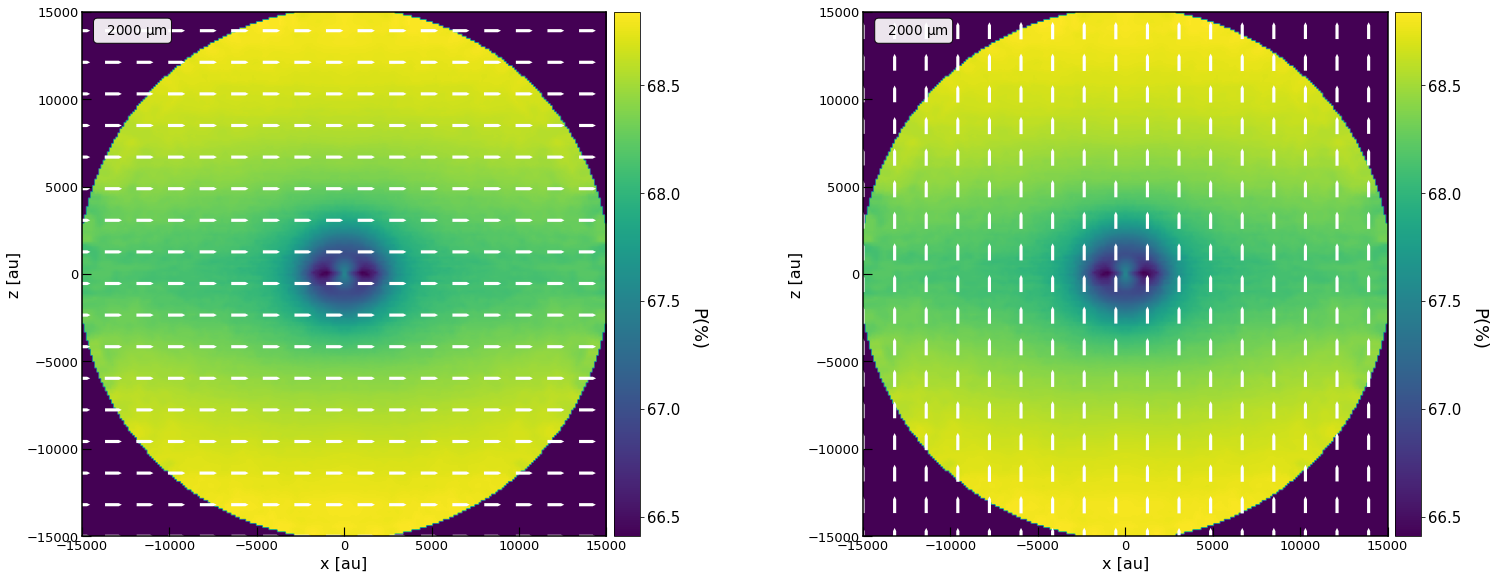

In [9]:
fig, ax = plt.subplots(1,2,figsize = (24,15))
plt.subplots_adjust(wspace = 0.4)
data.plot_polarization_map(fig, ax[0], model_name = '',  xlabel=True, 
		ylabel=True, titcolor=True, color = 'black')
data.plot_polarization_map(fig, ax[1], model_name = '',  xlabel=True, 
		ylabel=True, titcolor=True, plot_B_vector=True)

# 

## Polarization degree vs Intensity

In [5]:
I_matrix, P_matrix, tau_matrix, NH_matrix, nr_point = data.P_I_matrix(dictionary) 
I_mean, P_mean, tau_mean, NH_mean = data.mean_value(I_matrix, P_matrix, tau_matrix, NH_matrix, nr_point)

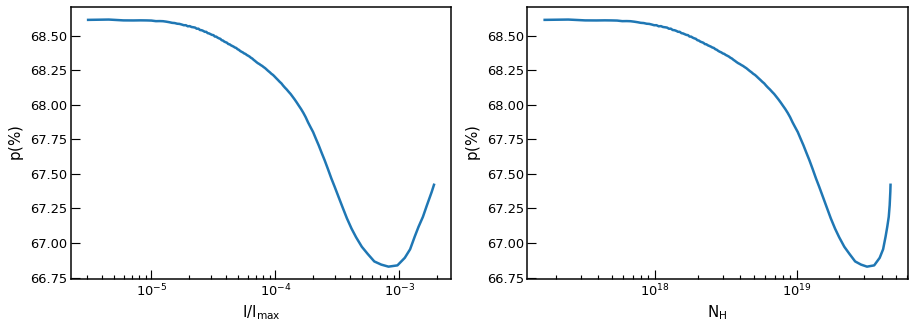

In [6]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))
ax[0].plot(I_mean, P_mean*100, linewidth = 2.5)
ax[0].set_xscale('log')
ax[0].set_xlabel(r'$\sf{\rm I/I_{\rm max}}$', fontsize = 15)
ax[0].set_ylabel(r'$\sf{\rm p(\%)}$', fontsize = 15)
pol.configure_figure(ax[0])

ax[1].plot(NH_mean, P_mean*100, linewidth = 2.5)
ax[1].set_xscale('log')
ax[1].set_xlabel(r'$\sf{\rm N_{\rm H}}$', fontsize = 15)
ax[1].set_ylabel(r'$\sf{\rm p(\%)}$', fontsize = 15)
pol.configure_figure(ax[1])